## Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest


In [ ]:
data = pd.read_excel(r'Assignment-census_income.xlsx')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Removing spaces from all columns

data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.head()

C:\Users\Kaveh\AppData\Local\Temp\ipykernel_23312\1381078349.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Task 5

Using one of the testing methods, find if there is race gap based on Education.

Formulate your null and alternate hypothesis. You may consider 0.05 as your significance level.

Calculate p-value and interpret your conclusion based on your defined hypothesis.

Null Hypothesis (H0): There is no race gap based on education.

Alternate Hypothesis (H1): There is a race gap based on education.

In [ ]:
race_education = pd.crosstab(data['education'], data['race'])
race_education

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education,,,,,
10th,16,13,133,9,762
11th,14,21,153,10,977
12th,5,9,70,14,335
1st-4th,4,5,16,9,134
5th-6th,2,18,21,13,279
7th-8th,9,11,56,17,553
9th,5,9,89,8,403
Assoc-acdm,8,29,107,8,915
Assoc-voc,19,38,112,6,1207


In [ ]:
result = chi2_contingency(race_education)
result.pvalue

5.547319569858434e-116

In [ ]:
# pvalue < 0.05 -> we reject null hypothesis

### Task 7

Use one of the testing methods to find out if there is any relationship among Marital status and income. How about relationship and income?

Formulate your null and alternate hypothesis. Consider 0.05 as your significance level.

Calculate p-value and interpret your conclusion based on your defined hypothesis.

In [ ]:
data['marital.status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y.income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
marital_income = pd.crosstab(data['marital.status'], data['Y.income'])
marital_income

Y.income,<=50K,>50K
marital.status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10192,491
Separated,959,66
Widowed,908,85


In [ ]:
# since the cross-tab result is so unbalanced,
# we can normalize the result to calculate the ratio instead of exact values

marital_income["lt50k"] = marital_income["<=50K"] / (marital_income["<=50K"] + marital_income[">50K"])
marital_income["gt50k"] = marital_income[">50K"] / (marital_income["<=50K"] + marital_income[">50K"])

marital_income = marital_income[["lt50k", "gt50k"]]
marital_income

Y.income,lt50k,gt50k
marital.status,,
Divorced,0.895791,0.104209
Married-AF-spouse,0.565217,0.434783
Married-civ-spouse,0.553152,0.446848
Married-spouse-absent,0.918660,0.081340
Never-married,0.954039,0.045961
Separated,0.935610,0.064390
Widowed,0.914401,0.085599


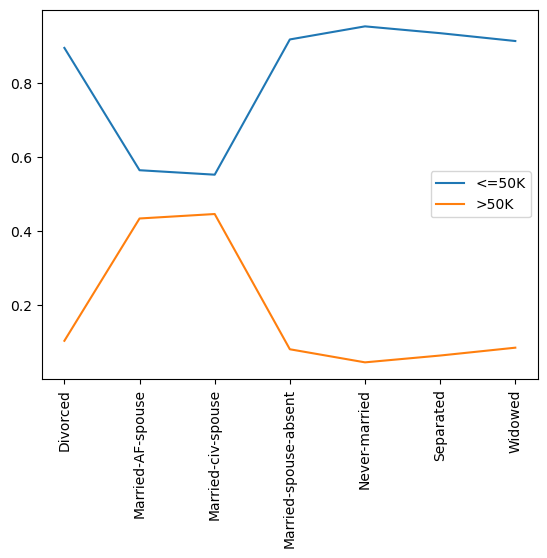

In [ ]:
plt.plot(marital_income)
plt.legend(data['Y.income'].unique())
plt.xticks(rotation=90)
plt.show()

In [ ]:
statistic = chi2_contingency(marital_income)
statistic


Chi2ContingencyResult(statistic=1.2972330969148578, pvalue=0.9718100528233138, dof=6, expected_freq=array([[0.81955289, 0.18044711],
       [0.81955289, 0.18044711],
       [0.81955289, 0.18044711],
       [0.81955289, 0.18044711],
       [0.81955289, 0.18044711],
       [0.81955289, 0.18044711],
       [0.81955289, 0.18044711]]))

### Task 8

Use one of the testing methods to find out if there is any relationship among Education num and Income. Formulate your null and alternate hypothesis. Consider **0.05 and 0.01 as your significance levels** and compare your results. Calculate p-value and interpret your conclusion based on your defined hypothesis.

H0: there is no relationship among Education num and Income.

H1: there is relationship among Education num and Income.

In [ ]:
data['Y.income'].unique()

array(['<=50K', '>50K'], dtype=object)

Categorial and Numerical value -

In [ ]:
data['Y.income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
data['Y.income'] = data['Y.income'].str.strip()

In [ ]:
data['Y.income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
less_equal_fifty = data[data['Y.income'] == '<=50K']['education.num']
greater_fifty = data[data['Y.income'] == '>50K']['education.num']

In [ ]:
less_equal_fifty.shape

(24720,)

In [ ]:
greater_fifty.shape

(7841,)

In [ ]:
# sometimes t-test is very sensitive to large datasets
# here we can create a smaller sample to calculate the distributions and t-test

less_equal_fifty = np.random.choice(less_equal_fifty, 500)
greater_fifty = np.random.choice(greater_fifty, 500)

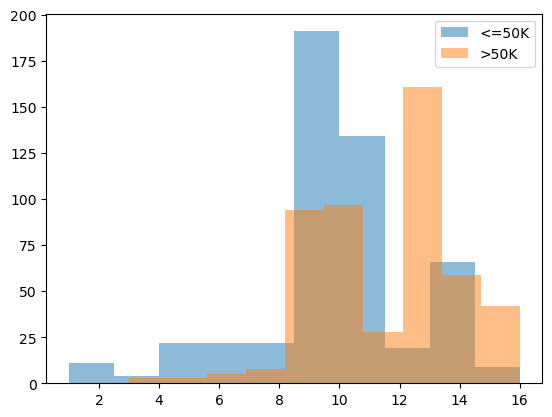

In [ ]:
plt.hist(less_equal_fifty, alpha=0.5, label="<=50K")
plt.hist(greater_fifty, alpha=0.5, label=">50K")
plt.legend()
plt.show()

In [ ]:
stats = st.ttest_ind(less_equal_fifty, greater_fifty, equal_var=True)
stats

TtestResult(statistic=-13.786974316274295, pvalue=1.0375083614419296e-39, df=998.0)